## Computer Image Fundamentals: Colors and RGBA Values

An RGBA value is a group of numbers that specify the amount of red, green, blue, and alpha (or transparency) in a color. 

In [1]:
from PIL import ImageColor

In [2]:
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

In [3]:
ImageColor.getcolor('chocolate', 'RGBA')

(210, 105, 30, 255)

Pillow supports a huge number of color names, from 'aliceblue' to 'whitesmoke'. You can find the full list of more than 100 standard color names in the resources at https://nostarch.com/automatestuff2/.

## Coordinate and Box Tuples

Image pixels are addressed with x- and y-coordinates, which respectively specify a pixel’s horizontal and vertical locations in an image. The origin is the pixel at the top-left corner of the image and is specified with the notation (0, 0). The first zero represents the x-coordinate, which starts at zero at the origin and increases going from left to right. The second zero represents the y-coordinate, which starts at zero at the origin and increases going down the image. This bears repeating: y-coordinates increase going downward, which is the opposite of how you may remember y-coordinates being used in math class.

Many of Pillow’s functions and methods take a box tuple argument. This means Pillow is expecting a tuple of four integer coordinates that represent a rectangular region in an image. The four integers are, in order, as follows:

* Left The x-coordinate of the leftmost edge of the box.
* Top The y-coordinate of the top edge of the box.
* Right The x-coordinate of one pixel to the right of the rightmost edge of the box. This integer must be greater than the left integer.
* Bottom The y-coordinate of one pixel lower than the bottom edge of the box. This integer must be greater than the top integer.

Note that the box includes the left and top coordinates and goes up to but does not include the right and bottom coordinates. For example, the box tuple (3, 1, 9, 6) represents all the pixels in the black box.

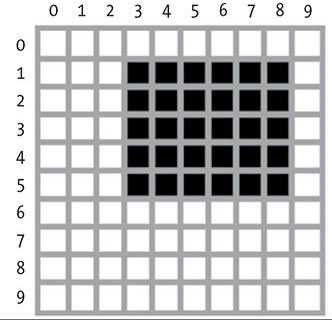

## Manipulating Images with Pillow

In [5]:
from PIL import Image
cat_image = Image.open(r"C:\Users\tg715c\Documents\Python Scripts\automate-stuff\automate_online-materials\zophie.png")

The `Image.open()` function returns a value of the Image object data type, which is how Pillow represents an image as a Python value. You can load an Image object from an image file (of any format) by passing the `Image.open()` function a string of the filename. Any changes you make to the Image object can be saved to an image file (also of any format) with the `save()` method. All the rotations, resizing, cropping, drawing, and other image manipulations will be done through method calls on this `Image` object.

## Working with the Image Data Type

An Image object has several useful attributes that give you basic information about the image file it was loaded from: its width and height, the filename, and the graphics format (such as JPEG, GIF, or PNG).

In [7]:
cat_image.size

(816, 1088)

In [8]:
cat_image.filename

'C:\\Users\\tg715c\\Documents\\Python Scripts\\automate-stuff\\automate_online-materials\\zophie.png'

In [9]:
cat_image.format

'PNG'

In [10]:
cat_image.format_description

'Portable network graphics'

In [13]:
cat_image.save(r'automate_online-materials\zophie.jpg')

Pillow also provides the `Image.new()` function, which returns an Image object—much like `Image.open()`, except the image represented by `Image.new()`’s object will be blank. The arguments to `Image.new()` are as follows:

* The string 'RGBA', which sets the color mode to RGBA. (There are other modes that this book doesn’t go into.)
* The size, as a two-integer tuple of the new image’s width and height.
* The background color that the image should start with, as a four-integer tuple of an RGBA value. You can use the return value of the `ImageColor.getcolor()` function for this argument. Alternatively, `Image.new()` also supports just passing the string of the standard color name.

In [14]:
im = Image.new('RGBA', (100, 200), 'purple')

In [15]:
im.save(r'automate_online-materials\purpleImage.png')

In [16]:
im2 = Image.new('RGBA', (20, 20))

Invisible black, (0, 0, 0, 0), is the default color used if no color argument is specified.

In [19]:
im2.save(r'automate_online-materials\transparentImage.png')

## Cropping Images

The `crop()` method on Image objects takes a box tuple and returns an Image object representing the cropped image. The cropping does not happen in place—that is, the original Image object is left untouched, and the crop() method returns a new Image object. 

In [38]:
from PIL import Image
cat_image = Image.open(r"C:\Users\tg715c\Documents\Python Scripts\automate-stuff\automate_online-materials\zophie.png")

In [39]:
cropped_image = cat_image.crop((335, 345, 565, 560))

In [40]:
cropped_image.save(r"automate_online-materials\zophie_cropped.png")

## Copying and Pasting Images onto other Images

The `copy()` method will return a new Image object with the same image as the Image object it was called on. This is useful if you need to make changes to an image but also want to keep an untouched version of the original.

In [41]:
cat_image_copy = cat_image.copy()

The `paste()` method is called on an Image object and pastes another image on top of it. 

In [42]:
face_image = cat_image.crop((335, 345, 565, 560))

In [43]:
cat_image_copy.paste(face_image, (0,0))

In [44]:
cat_image_copy.paste(face_image,(400, 500))

In [45]:
cat_image_copy.save(r"automate_online-materials\zophie_pasted.png")

Note that the `paste()` method modifies its Image object in place; it does not return an Image object with the pasted image. If you want to call `paste()` but also keep an untouched version of the original image around, you’ll need to first copy the image and then call `paste()` on that copy.

## Resizing an Image

The `resize()` method is called on an Image object and returns a new Image object of the specified width and height. It accepts a two-integer tuple argument, representing the new width and height of the returned image. 

In [46]:
w, h = cat_image.size

In [47]:
w

816

In [48]:
h

1088

In [50]:
quarter_sized = cat_image.resize((int(w / 2), int(h / 2)))

In [54]:
quarter_sized.save(r"automate_online-materials\zophie_quarter_sized.png")

In [55]:
svelte_sized = cat_image.resize((w, h + 300))

In [56]:
svelte_sized.save(r"automate_online-materials\zophie_svelte_sized.png")

## Rotating and Flipping Images

Images can be rotated with the `rotate()` method, which returns a new Image object of the rotated image and leaves the original Image object unchanged. The argument to `rotate()` is a single integer or float representing the number of degrees to rotate the image counterclockwise.

The `rotate()` method has an optional `expand` keyword argument that can be set to True to enlarge the dimensions of the image to fit the entire rotated new image. 

In [80]:
cat_image = Image.open(r"C:\Users\tg715c\Documents\Python Scripts\automate-stuff\automate_online-materials\zophie.png")

In [81]:
cat_image.show()

In [70]:
cat_image.rotate(90, expand=True).save(r"automate_online-materials\zophie_rotated90.png")

In [71]:
cat_image.rotate(180, expand=True).save(r"automate_online-materials\zophie_rotated180.png")

In [72]:
cat_image.rotate(270, expand=True).save(r"automate_online-materials\zophie_rotated270.png")

You can also get a “mirror flip” of an image with the `transpose()` method. You must pass either `Image.FLIP_LEFT_RIGHT` or `Image.FLIP_TOP_BOTTOM` to the `transpose()` method.

In [82]:
cat_image.transpose(Image.FLIP_LEFT_RIGHT).save(r"automate_online-materials\zophie_horizontal_flipped.png")

## Changing Individual Pixels

The color of an individual pixel can be retrieved or set with the `getpixel()` and `putpixel()` methods. These methods both take a tuple representing the x- and y-coordinates of the pixel. The `putpixel()` method also takes an additional tuple argument for the color of the pixel. This color argument is a four-integer RGBA tuple or a three-integer RGB tuple.

In [88]:
im = Image.new('RGBA', (100, 100))

In [90]:
im.show()

In [91]:
im.getpixel((0, 0))

(0, 0, 0, 0)

In [92]:
for x in range(100):
    for y in range(50):
        im.putpixel((x, y), (210, 210, 210))

In [93]:
im.show()

In [95]:
from PIL import ImageColor
for x in range(100):
    for y in range(50, 100):
        im.putpixel((x, y), ImageColor.getcolor('darkgray', 'RGBA'))

In [96]:
im.show()

## Drawing on Images

If you need to draw lines, rectangles, circles, or other simple shapes on an image, use Pillow’s `ImageDraw` module.

In [97]:
from PIL import Image, ImageDraw

In [98]:
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)

**Points**

The `point(xy, fill)` method draws individual pixels. The xy argument represents a list of the points you want to draw. The list can be a list of x- and y-coordinate tuples, such as [(x, y), (x, y), …], or a list of x- and y-coordinates without tuples, such as [x1, y1, x2, y2, …]. The fill argument is the color of the points and is either an RGBA tuple or a string of a color name, such as 'red'. The fill argument is optional.

**Lines**

The `line(xy, fill, width)` method draws a line or series of lines. xy is either a list of tuples, such as [(x, y), (x, y), …], or a list of integers, such as [x1, y1, x2, y2, …]. Each point is one of the connecting points on the lines you’re drawing. The optional fill argument is the color of the lines, as an RGBA tuple or color name. The optional width argument is the width of the lines and defaults to 1 if left unspecified.

**Rectangles**

The `rectangle(xy, fill, outline)` method draws a rectangle. The xy argument is a box tuple of the form (left, top, right, bottom). The left and top values specify the x- and y-coordinates of the upper-left corner of the rectangle, while right and bottom specify the lower-right corner. The optional fill argument is the color that will fill the inside of the rectangle. The optional outline argument is the color of the rectangle’s outline.

**Ellipses**

The `ellipse(xy, fill, outline)` method draws an ellipse. If the width and height of the ellipse are identical, this method will draw a circle. The xy argument is a box tuple (left, top, right, bottom) that represents a box that precisely contains the ellipse. The optional fill argument is the color of the inside of the ellipse, and the optional outline argument is the color of the ellipse’s outline.

**Polygons**

The `polygon(xy, fill, outline)` method draws an arbitrary polygon. The xy argument is a list of tuples, such as [(x, y), (x, y), …], or integers, such as [x1, y1, x2, y2, …], representing the connecting points of the polygon’s sides. The last pair of coordinates will be automatically connected to the first pair. The optional fill argument is the color of the inside of the polygon, and the optional outline argument is the color of the polygon’s outline.

draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')

In [101]:
draw.ellipse((120, 30, 160, 60), fill='red')

In [102]:
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)), fill='brown')

In [103]:
im.save(r"automate_online-materials\drawing.png")

## Drawing Text

The `ImageDraw` object also has a `text()` method for drawing text onto an image. The `text()` method takes four arguments: `xy`, `text`, `fill`, and `font`.

* The `xy` argument is a two-integer tuple specifying the upper-left corner of the text box.
* The `text` argument is the string of text you want to write.
* The optional `fill` argument is the color of the text.
* The optional `font` argument is an ImageFont object, used to set the typeface and size of the text. This is described in more detail in the next section.

Since it’s often hard to know in advance what size a block of text will be in a given font, the `ImageDraw` module also offers a `textsize()` method. Its first argument is the string of text you want to measure, and its second argument is an optional `ImageFont` object. The `textsize()` method will then return a two-integer tuple of the width and height that the text in the given font would be if it were written onto the image. You can use this width and height to help you calculate exactly where you want to put the text on your image.

The first three arguments for `text()` are straightforward. Before we use `text()` to draw text onto an image, let’s look at the optional fourth argument, the `ImageFont` object.

Both `text()` and `textsize()` take an optional `ImageFont` object as their final arguments. To create one of these objects, first run the following:

In [105]:
from PIL import ImageFont

Now that you’ve imported Pillow’s `ImageFont` module, you can call the `ImageFont.truetype()` function, which takes two arguments. The first argument is a string for the font’s TrueType file—this is the actual font file that lives on your hard drive. A TrueType file has the .ttf file extension and can usually be found in the following folders:

* On Windows: `C:\Windows\Fonts`
* On macOS: `/Library/Fonts and /System/Library/Fonts`
* On Linux: `/usr/share/fonts/truetype`

You don’t actually need to enter these paths as part of the TrueType file string because Python knows to automatically search for fonts in these directories. But Python will display an error if it is unable to find the font you specified.

The second argument to `ImageFont.truetype()` is an integer for the font size in points (rather than, say, pixels). Keep in mind that Pillow creates PNG images that are 72 pixels per inch by default, and a point is 1/72 of an inch.

Enter the following into the interactive shell, replacing `FONT_FOLDER` with the actual folder name your operating system uses:

In [112]:
from PIL import Image, ImageDraw, ImageFont
import os
FONT_FOLDER = r"C:\Windows\Fonts"

In [113]:
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)

In [114]:
draw.text((20, 150), 'Hello', fill='purple')
fontsFolder = 'FONT_FOLDER' # e.g. '/Library/Fonts'
arialFont = ImageFont.truetype(os.path.join(fontsFolder, 'arial.ttf'), 32)
draw.text((100, 150), 'Howdy', fill='gray', font=arialFont)
im.save(r"automate_online-materials\text.png")

In [115]:
im.show()